In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
def create_pascal_label_colormap():
  """Creates a label colormap used in PASCAL VOC segmentation benchmark.

  Returns:
    A Colormap for visualizing segmentation results.
  """
  colormap = np.zeros((256, 3), dtype=int)
  ind = np.arange(256, dtype=int)

  for shift in reversed(range(8)):
    for channel in range(3):
      colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

  return colormap

In [3]:
def label_to_color_image(label):
  """Adds color defined by the dataset colormap to the label.

  Args:
    label: A 2D array with integer type, storing the segmentation label.

  Returns:
    result: A 2D array with floating type. The element of the array
      is the color indexed by the corresponding element in the input label
      to the PASCAL color map.

  Raises:
    ValueError: If label is not of rank 2 or its value is larger than color
      map maximum entry.
  """
  if label.ndim != 2:
    raise ValueError('Expect 2-D input label')

  colormap = create_pascal_label_colormap()

  if np.max(label) >= len(colormap):
    raise ValueError('label value too large.')

  return colormap[label]

In [19]:
LABEL_NAMES = np.asarray([
    'road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic light',
    'traffic sign', 'vegetation',  'terrain',
     'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train', 
     'motorcycle', 'bicycle'
])

# LABEL_NAMES = np.asarray([
#     'unlabeled', 'ego vehicle', 'out of roi', 'static', 'dynamic', 'ground', 'road',
#     'sidewalk', 'parking', 'rail track', 'building', 'wall', 'fence', 'guard rail', 'bridge',
#     'tunnel', 'pole', 'polegroup', 'traffic light', 'traffic sign', 'vegetation', 'terrain',
#      'sky', 'person', 'rider', 'car', 'truck', 'bus', 'caravan', 'trailer', 'train', 
#      'motorcycle', 'bicycle', 'license plate'
# ])

FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)
FULL_COLOR_MAP.shape

(19, 1, 3)

In [20]:
from cv2 import imwrite,imread
from PIL import Image

# imwrite("full_color_map.png", FULL_COLOR_MAP)
seg_img_int8=np.uint8(FULL_COLOR_MAP)
seg_im=Image.fromarray(seg_img_int8)
seg_im.save("seg_img.PNG")


In [21]:
from cv2 import IMREAD_GRAYSCALE


read_img = imread("seg_img.PNG", IMREAD_GRAYSCALE)
read_img.shape

(19, 1)

In [22]:
label_dict={}
for i in np.arange(19):
    label_dict[LABEL_NAMES[i]] = read_img[i,0]

label_dict

{'road': 0,
 'sidewalk': 38,
 'building': 75,
 'wall': 113,
 'fence': 14,
 'pole': 52,
 'traffic light': 89,
 'traffic sign': 128,
 'vegetation': 19,
 'terrain': 57,
 'sky': 94,
 'person': 132,
 'rider': 33,
 'car': 72,
 'truck': 108,
 'bus': 147,
 'train': 37,
 'motorcycle': 75,
 'bicycle': 112}

In [12]:
a=np.arange(0,100)
a=a.reshape(50,2)


In [13]:
b=np.arange(20)
b=b.reshape(4,5)
b

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [16]:
a[b].shape

(4, 5, 2)

In [3]:
A=1000
cs = np.arange(0.01,1,0.01)
cs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

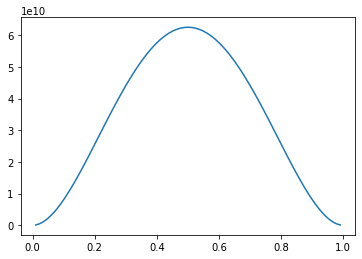

In [13]:
a=[]
for c in cs:
    result = c**2 * A**4 - 2*c**3*A**4 + c**4*A**4
    a.append(result)

a=np.array(a)
plt.plot(cs,a)

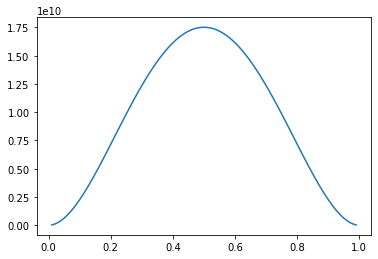

In [14]:
H=376
W=1408
a=[]
for c in cs:
    result = (H*W - c*H*W - c*H*W + c**2*H*W)*c**2*H*W
    a.append(result)

a=np.array(a)
plt.plot(cs,a)

In [4]:
H=376
W=1408
h=20
w=10
result = (H*W - h*W - H*w + h*w)*h*w
result *0.000016

1592.6016

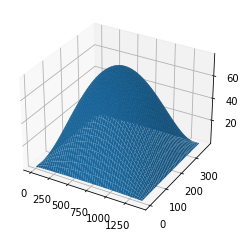

In [34]:
a=[]
for h in np.arange(1,H):
    for w in np.arange(1,W):
        # h=i*H
        # w=j*H
        result = (H*W - h*W - H*w + h*w)*h*w*0.000016/3600
        a.append(result)

a=np.array(a)
Z=a.reshape(H-1,W-1)
y=np.arange(1,H)
x=np.arange(1,W)
X,Y = np.meshgrid(x,y)




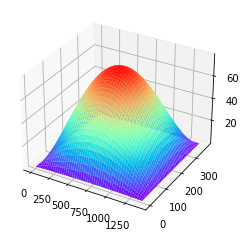

In [56]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap='rainbow')
# ax.contour(X,Y,Z)